###
### Qiskit 1.0.x $-$ 'hello world'

In [1]:
### qiskit version
import qiskit; print('versão do qiskit:', qiskit.__version__)

versão do qiskit: 1.0.2


In [2]:
### 'IBMQ.get_provider( )', 'IBM.save_account', 'IBM.load_account()':
from qiskit_ibm_runtime import QiskitRuntimeService
# my_token = '...'
# service = QiskitRuntimeService(channel='ibm_quantum', token = my_token)
# QiskitRuntimeService .save_account(channel='ibm_quantum', token = my_token)

from numpy import *
from qiskit import *
from qiskit_aer import AerSimulator; 
from qiskit_ibm_runtime import *
from qiskit.transpiler.preset_passmanagers import *
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import *

### 'Aer.get_backend( )'
simulator = AerSimulator()
pm = generate_preset_pass_manager(backend=simulator, optimization_level=1)

### simulação -> sampler
sampler = Sampler(backend = simulator)
sampler.options.default_shots = 8000  ### Nshots
nshots = sampler.options.default_shots  

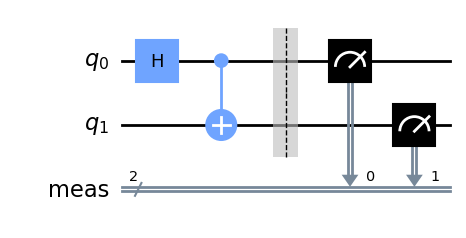

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw('mpl', style='clifford') 

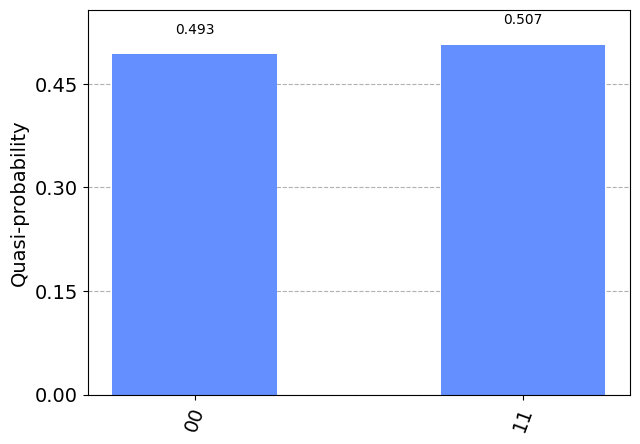

In [4]:
### se o circuito tiver um .append() é necessário decompor; transpile() ou decompose()
qc = transpile(qc, simulator) 

### nome do circuito entre [ ]
job = sampler.run([qc]).result() 

### o nome do classicalregister é 'meas' quando for utilizado o '.measure_all()'
counts = job[0].data.meas.get_counts() 

plot_distribution(counts)

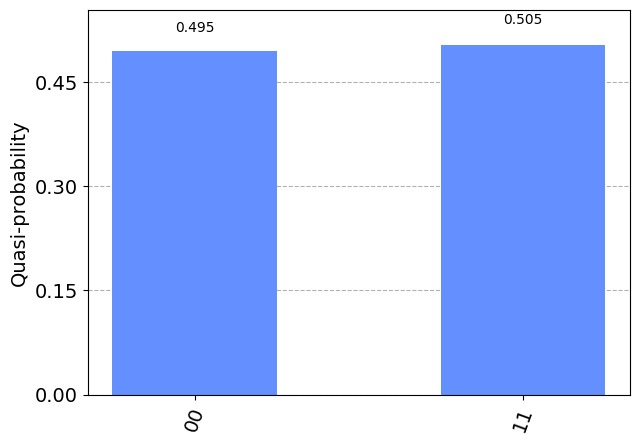

In [5]:
### em 1 linha:
plot_distribution(sampler.run([transpile(qc, simulator)]).result()[0].data.meas.get_counts())